# Proyecto 2-Parte I (Core)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils


In [6]:
data = pd.read_csv('../datasets/4-user_behavior_dataset.csv')

In [7]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


Eliminamos la Columna User ID porque no aporta nada

In [9]:
data.drop(columns=['User ID'], inplace=True)

Verificamos si existen duplicados

In [10]:
duplicados = data.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


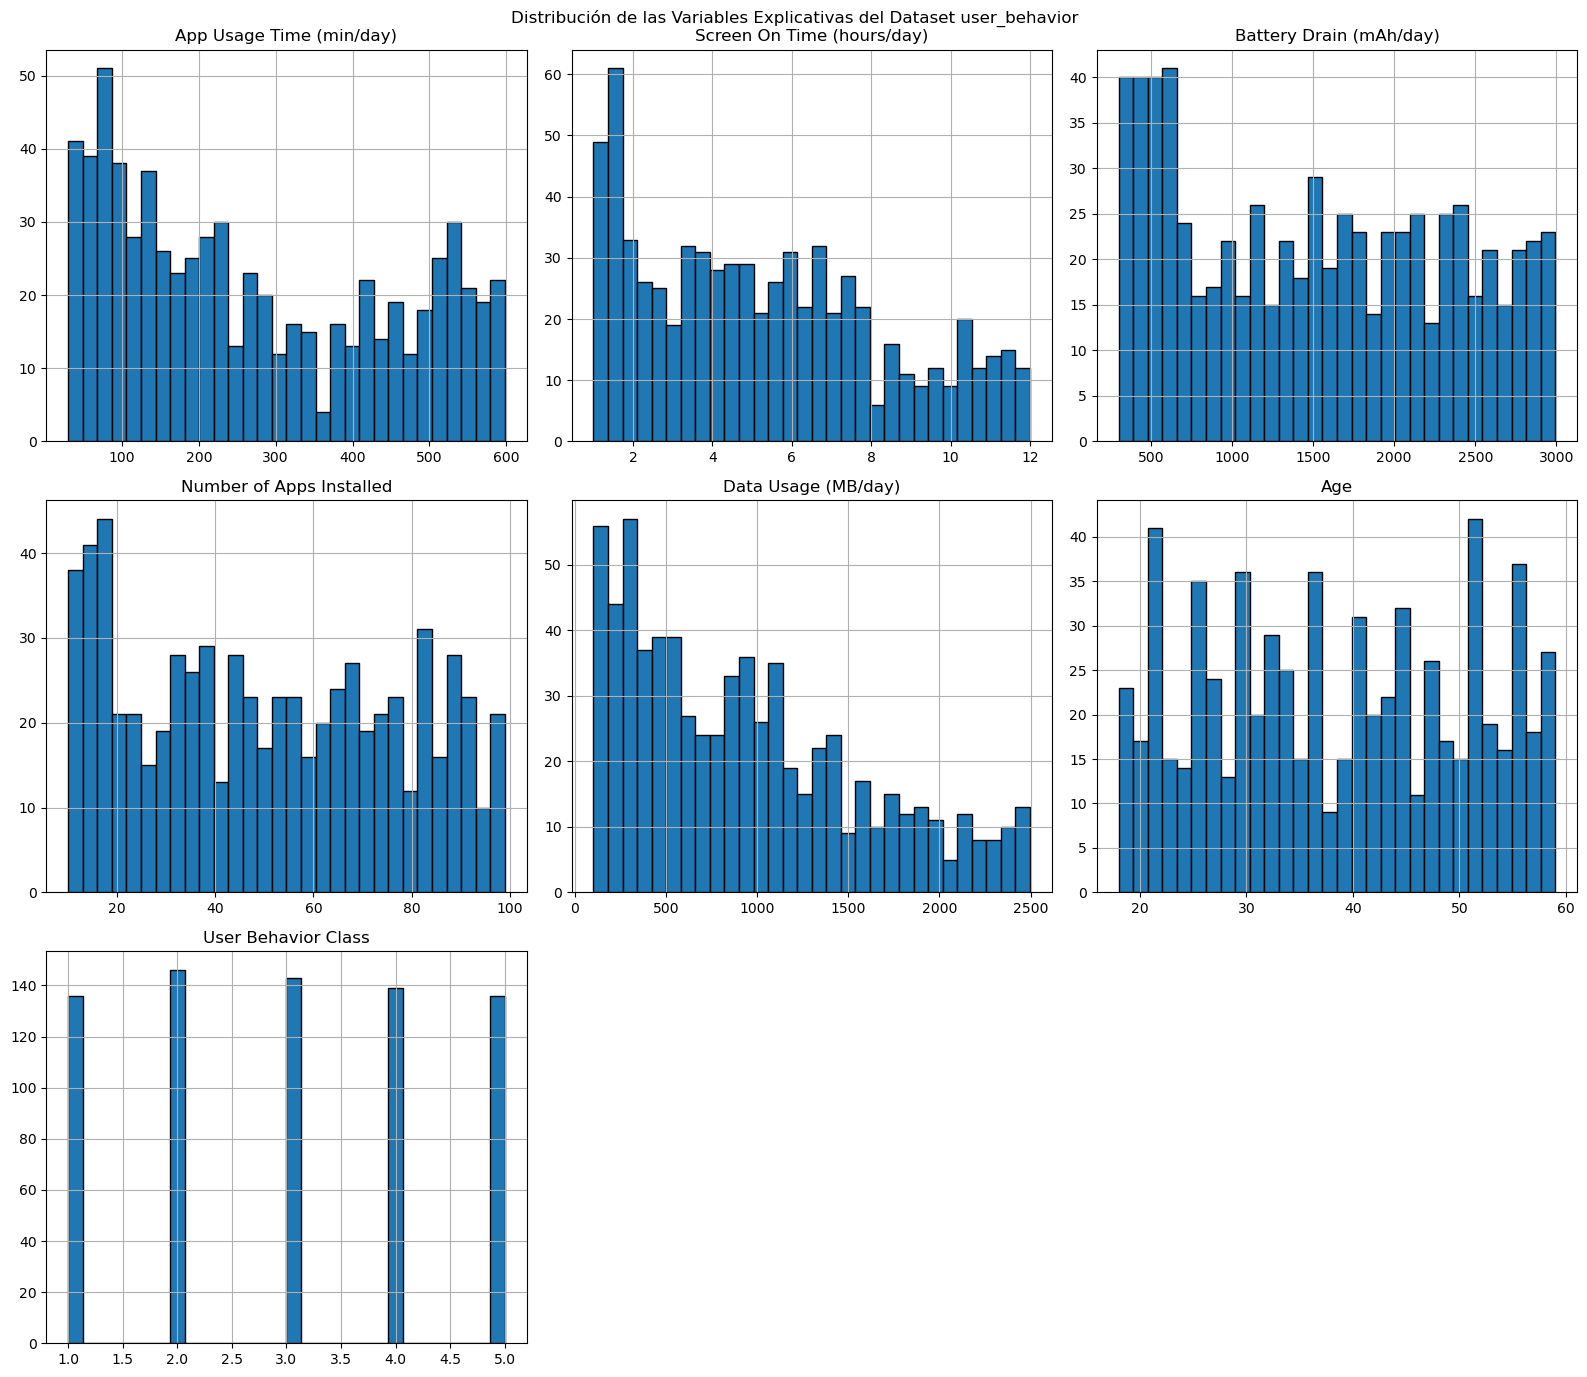

In [11]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(16, 14), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset user_behavior')
plt.tight_layout()
plt.show()

Separamos las variables categoricas y numericas para mejor control

In [12]:
# Seleccionar las columnas categoricas
categorical_columns = data.select_dtypes(include=['object', 'category', 'bool'])
# Seleccionar las columnas numéricas
numerical_columns = data.select_dtypes(include=[np.number])

Consistencia en valores categoricos

In [13]:
data_dict_category = {
    'Device Model': 'category',
    'Operating System': 'category',
    'Gender': 'category'
}
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict_category.items():
    categorical_columns[column] = categorical_columns[column].astype(dtype, errors='ignore')
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Device Model      700 non-null    category
 1   Operating System  700 non-null    category
 2   Gender            700 non-null    category
dtypes: category(3)
memory usage: 2.6 KB


Limpiamos las columnas categoricas, nos aseguramos de quitar mayusculas y cualquier caracter invalido

In [14]:
# Aplicar la limpieza a las columnas categóricas
for col in categorical_columns:
    categorical_columns[col] = categorical_columns[col].apply(utils.limpiar_cadena)
# Verificar los cambios
for col in categorical_columns:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(categorical_columns[col].unique())


Valores únicos después de limpieza en 'Device Model':
['google pixel', 'oneplus', 'xiaomi mi', 'iphone', 'samsung galaxy s']
Categories (5, object): ['google pixel', 'oneplus', 'samsung galaxy s', 'xiaomi mi', 'iphone']

Valores únicos después de limpieza en 'Operating System':
['android', 'ios']
Categories (2, object): ['android', 'ios']

Valores únicos después de limpieza en 'Gender':
['male', 'female']
Categories (2, object): ['female', 'male']


Verificamos que esten todos correctos

In [15]:
# Ejecutar la validación
mismatches = utils.validar_tipos(categorical_columns, data_dict_category)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Todos los tipos de datos son correctos.


Vemos si existen NaN en las columnas categoricas

In [16]:
utils.calculate_na_statistics(categorical_columns)

,datos sin NAs en q,Na en q,Na en %
Device Model,700,0,0.0
Operating System,700,0,0.0
Gender,700,0,0.0


Consistencia en valores numericos

In [17]:
numerical_columns

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
0,393,6.4,1872,67,1122,40,4
1,268,4.7,1331,42,944,47,3
2,154,4.0,761,32,322,42,2
3,239,4.8,1676,56,871,20,3
4,187,4.3,1367,58,988,31,3
...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,22,2
696,316,6.8,1965,68,1201,59,4
697,99,3.1,942,22,457,50,2
698,62,1.7,431,13,224,44,1


In [18]:
data_dict_numeric = {
    'App Usage Time (min/day)': 'int',
    'Screen On Time (hours/day)': 'float',
    'Battery Drain (mAh/day)': 'int',
    'Number of Apps Installed': 'int',
    'Data Usage (MB/day)': 'int',
    'Age': 'int',
    'User Behavior Class': 'int'
}
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict_numeric.items():
    numerical_columns[column] = numerical_columns[column].astype(dtype, errors='ignore')
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App Usage Time (min/day)    700 non-null    int32  
 1   Screen On Time (hours/day)  700 non-null    float64
 2   Battery Drain (mAh/day)     700 non-null    int32  
 3   Number of Apps Installed    700 non-null    int32  
 4   Data Usage (MB/day)         700 non-null    int32  
 5   Age                         700 non-null    int32  
 6   User Behavior Class         700 non-null    int32  
dtypes: float64(1), int32(6)
memory usage: 22.0 KB


Limpiamos las columnas numericas

In [19]:
for col in numerical_columns:
    numerical_columns[col] = numerical_columns[col].apply(utils.limpiar_cadena)
# Verificar los cambios
for col in numerical_columns:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(numerical_columns[col].unique())


Valores únicos después de limpieza en 'App Usage Time (min/day)':
[393 268 154 239 187  99 350 543 340 424  53 215 462 189 503 132 299  81
 577  93 576 423 292 216  91 444 512 452 412 260 197 278  46 593  32 122
 522 473 398 240 120 152 138 502 558 580 589 245 125  97 516  68  64 539
 428 325 309  79 545 459 225 257 134  82 521 457  31  47 229  34 173  78
 230 565 172 330  39 223 404 151 137 301 116 291  84 411 326 550  59  41
 183 174 274 166  66  54  95 488 295 136 471 121  75 220 388 529 584 227
 535 332 252 540 320 176  83 555 237 497 219 448 156 524 188 443  52 228
 149 523  42 329 158  86 339 304 131 442 595  35 587  92 153 368  51 279
 255 193 207 474 544  73 597 498 402 130 432 262 202  80 126 495 127  88
  69 100 163 451 481 133 553 499 101 433 351 532 511 384 360 159 537 129
  37 425 573  45 564 162  30  71 314 168 441 397 272 201 570 334 518  70
 563 181 208 381 426 284 105 179 501 269  85 386  49 534 211  55 226  65
 458 170 264 420 267 469 541 155 106 243 410 285 341 281 

Verificamos si existen NaN en las columnas numericas

In [20]:
utils.calculate_na_statistics(numerical_columns)

,datos sin NAs en q,Na en q,Na en %
App Usage Time (min/day),700,0,0.0
Screen On Time (hours/day),700,0,0.0
Battery Drain (mAh/day),700,0,0.0
Number of Apps Installed,700,0,0.0
Data Usage (MB/day),700,0,0.0
Age,700,0,0.0
User Behavior Class,700,0,0.0


Graficamos boxplots para identificar los posibles Outliers

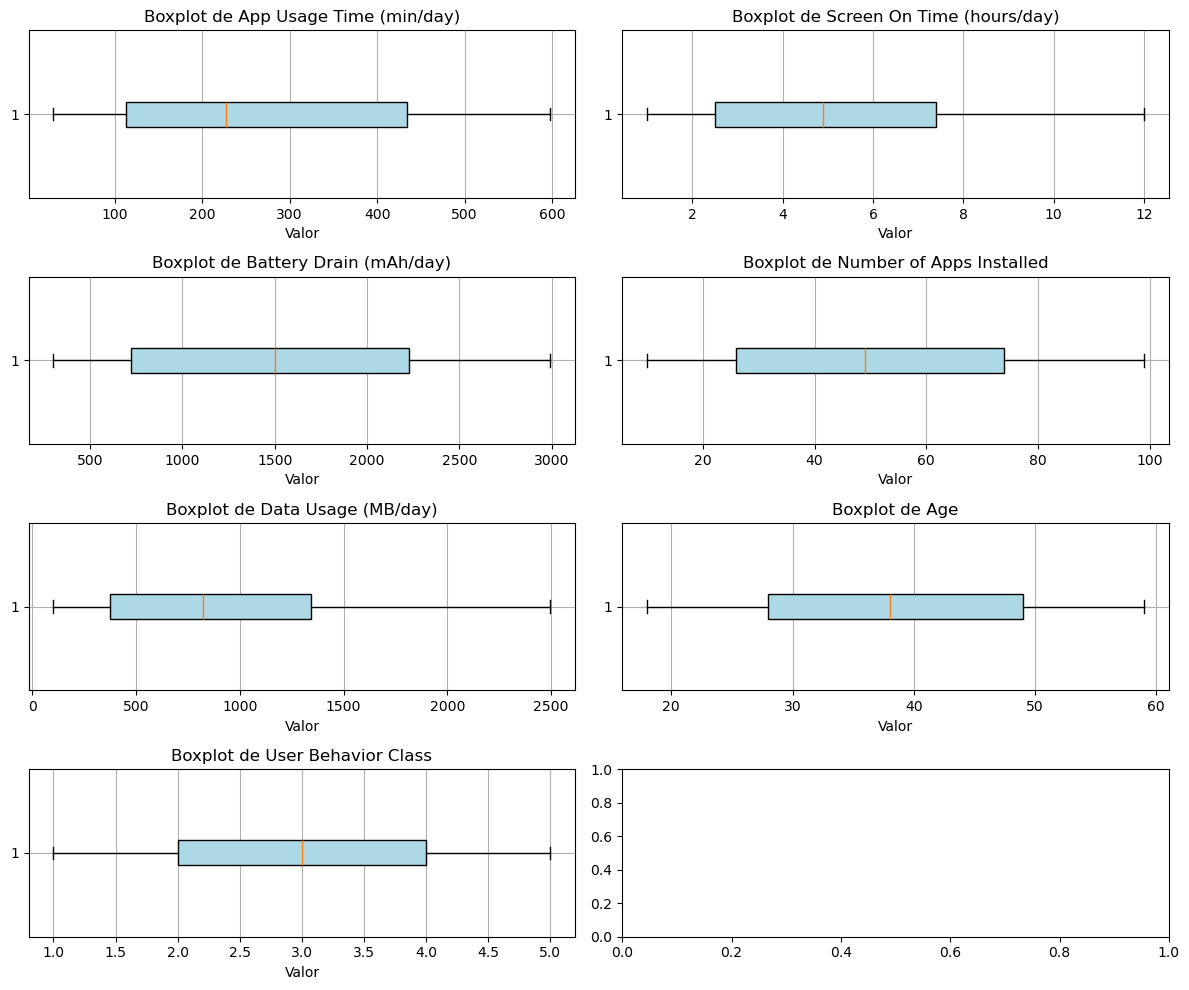

In [21]:
# Crear gráficos de boxplot separados para cada característica
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Graficar cada variable en un boxplot separado
for i, col in enumerate(numerical_columns.columns):
    axes[i].boxplot(numerical_columns[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot de {col}'),
    axes[i].set_xlabel('Valor')
    axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

Calculamos los porcentajes de Outliers

In [22]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number])
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(data[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data[column][~outliers].min(),
        'Upper Bound': data[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
App Usage Time (min/day),0.0,0.0,30.0,598.0
Screen On Time (hours/day),0.0,0.0,1.0,12.0
Battery Drain (mAh/day),0.0,0.0,302.0,2993.0
Number of Apps Installed,0.0,0.0,10.0,99.0
Data Usage (MB/day),0.0,0.0,102.0,2497.0
Age,0.0,0.0,18.0,59.0
User Behavior Class,0.0,0.0,1.0,5.0


Analizamos las columnas con outliers


📊 Análisis de Distribución para Data Usage (MB/day)
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 929.7429
- Mediana: 823.5000
- Desv_est: 640.4517
- Asimetria: 0.6993
- Kurtosis: -0.4604
- Min: 102.0000
- Max: 2497.0000

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.0014
- Weibull: p-valor = 0.0167

⚖️ Características de Distribución:
- Asimetría positiva (cola hacia la derecha)
- Distribución mesocúrtica (similar a normal)

🏆 Mejor distribución: Weibull
⚠️ Advertencia: Ninguna distribución se ajusta perfectamente


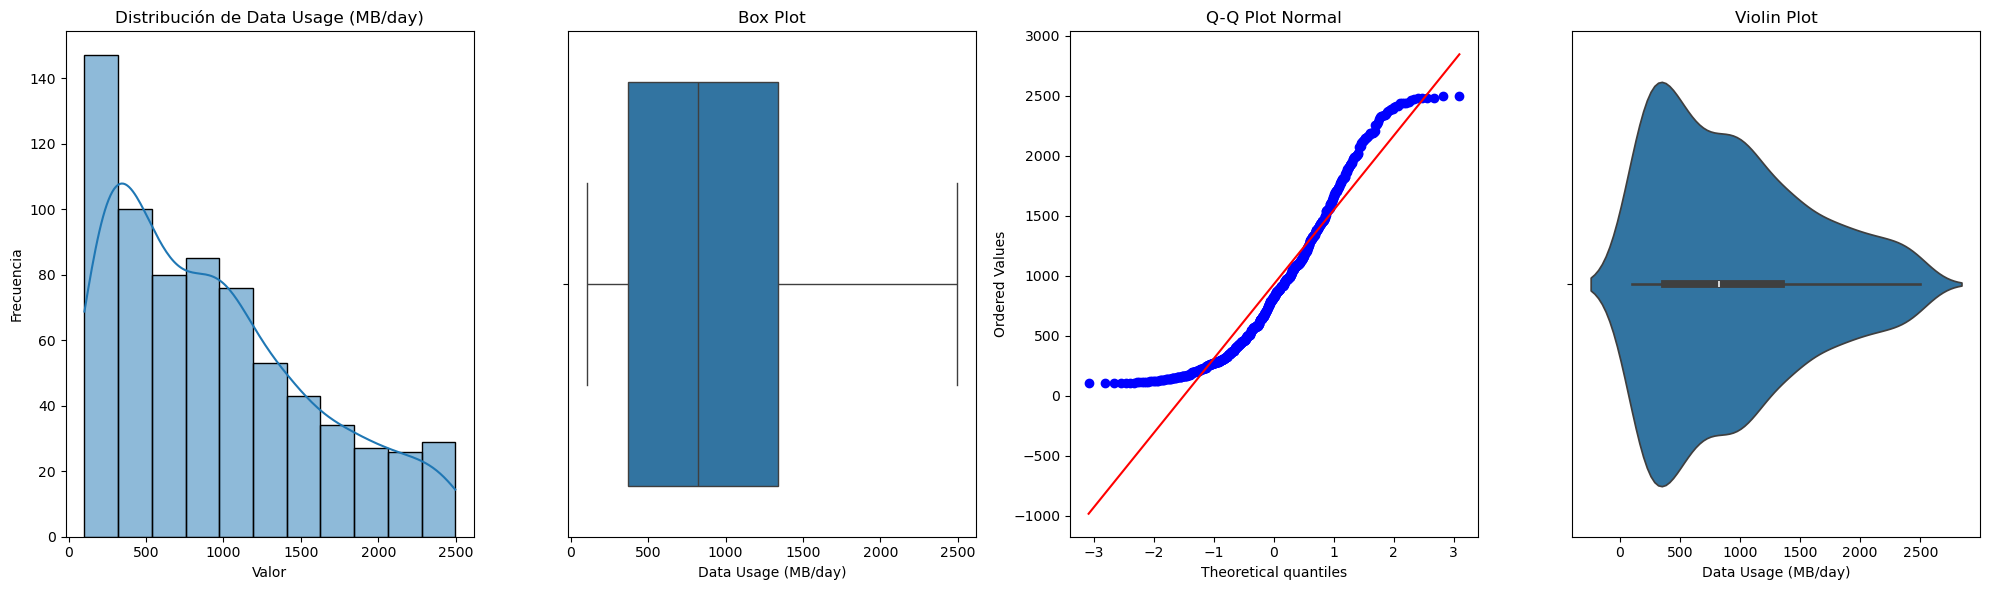

In [23]:
resultados = utils.analizar_distribucion_avanzada(data['Data Usage (MB/day)'], 'Data Usage (MB/day)')


📊 Análisis de Distribución para Screen On Time (hours/day)
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 5.2727
- Mediana: 4.9000
- Desv_est: 3.0686
- Asimetria: 0.4600
- Kurtosis: -0.8177
- Min: 1.0000
- Max: 12.0000

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.0001
- Weibull: p-valor = 0.0006

⚖️ Características de Distribución:
- Distribución aproximadamente simétrica
- Distribución platicúrtica (más plana)

🏆 Mejor distribución: Weibull
⚠️ Advertencia: Ninguna distribución se ajusta perfectamente


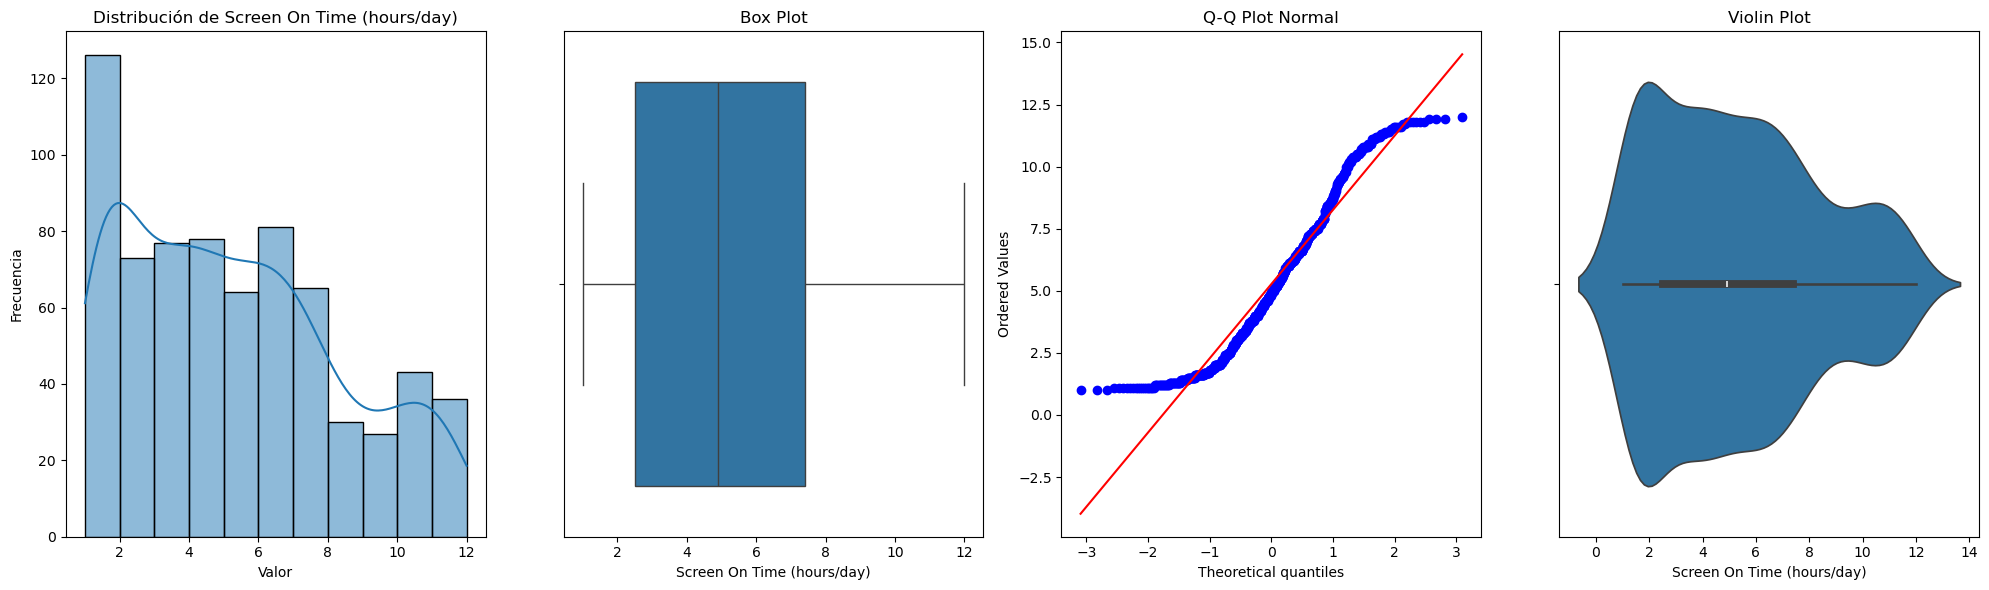

In [24]:
resultados = utils.analizar_distribucion_avanzada(data['Screen On Time (hours/day)'], 'Screen On Time (hours/day)')

Despues de analizar los outliers decido no imputar nada porque no existen Outliers

In [25]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in numerical_columns:
    datos_columna = data[columna].values
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
App Usage Time (min/day),700.0,271.13,227.5,177.20,30.0,598.0,113.25,434.25
Screen On Time (hours/day),700.0,5.27,4.9,3.07,1.0,12.0,2.50,7.40
Battery Drain (mAh/day),700.0,1525.16,1502.5,819.14,302.0,2993.0,722.25,2229.50
Number of Apps Installed,700.0,50.68,49.0,26.94,10.0,99.0,26.00,74.00
Data Usage (MB/day),700.0,929.74,823.5,640.45,102.0,2497.0,373.00,1341.00
Age,700.0,38.48,38.0,12.01,18.0,59.0,28.00,49.00
User Behavior Class,700.0,2.99,3.0,1.40,1.0,5.0,2.00,4.00


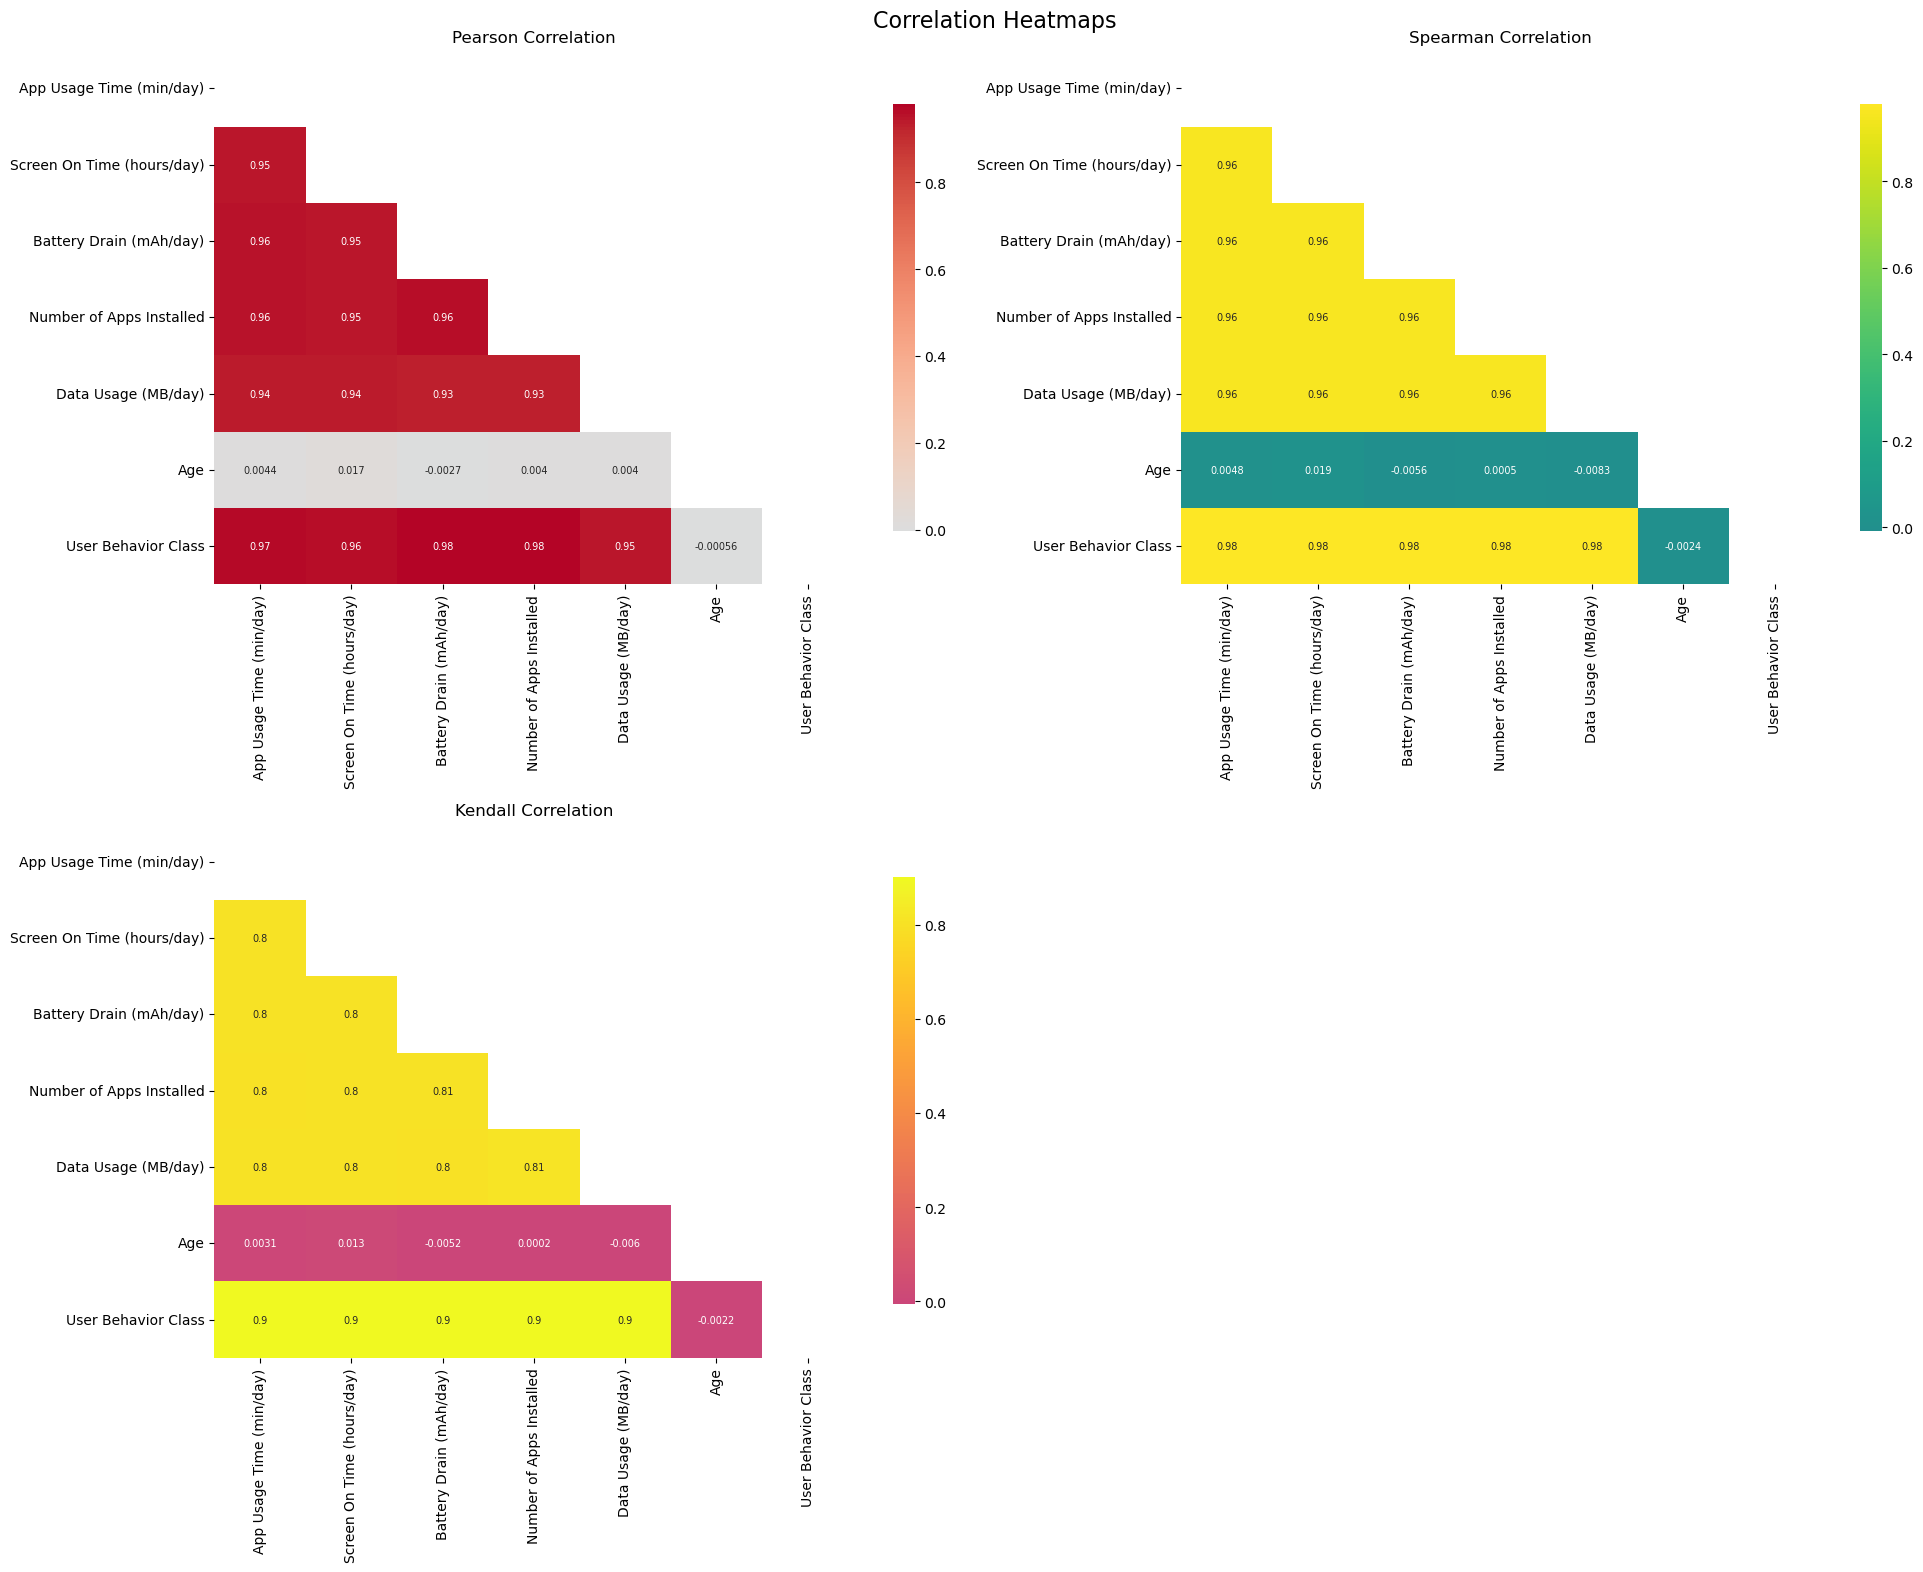

In [26]:
pearson_corr = numerical_columns.corr(method='pearson')
spearman_corr = numerical_columns.corr(method='spearman')
kendall_corr = numerical_columns.corr(method='kendall')

utils.graph_correlations(
    pearson_corr, 
    spearman_corr, 
    kendall_corr, 
    title="Correlation Heatmaps", 
    figsize=(20, 16),
    annot_size=7
)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


In [28]:
data_clean = pd.concat([numerical_columns, categorical_columns], axis=1)
data_clean



,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model,Operating System,Gender
0,393,6.4,1872,67,1122,40,4,google pixel,android,male
1,268,4.7,1331,42,944,47,3,oneplus,android,female
2,154,4.0,761,32,322,42,2,xiaomi mi,android,male
3,239,4.8,1676,56,871,20,3,google pixel,android,male
4,187,4.3,1367,58,988,31,3,iphone,ios,female
...,...,...,...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,22,2,iphone,ios,male
696,316,6.8,1965,68,1201,59,4,xiaomi mi,android,male
697,99,3.1,942,22,457,50,2,google pixel,android,female
698,62,1.7,431,13,224,44,1,samsung galaxy s,android,male
